In [18]:
!pip install faker

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from faker import Faker
import json

# from google.colab import drive
# drive.mount("/content/drive")

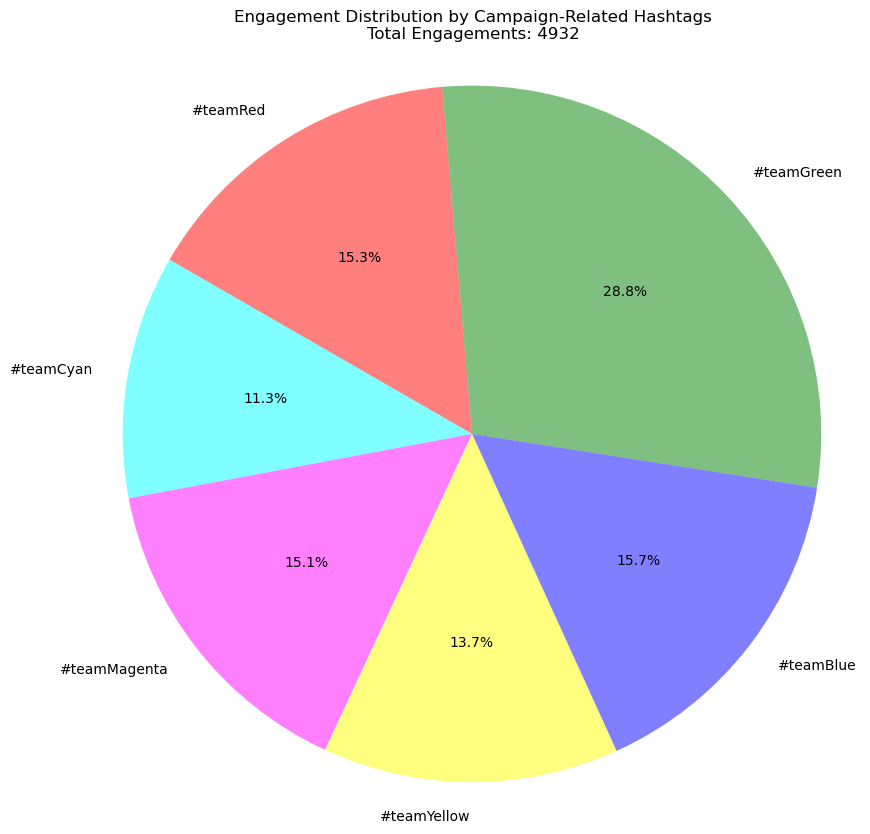

In [20]:
# ---
# Group No. 8
# 1. นนทรีย์ คำวันสา 6410450486
# 2. วินัสดา นิธิธรรมจรรยา 6410450591
# 3. อรรถวิชญ์ สิทธิ์เดชวิกรม 6410451920
# ---

group = 8 # อย่าลืมเปลี่ยนเลขกลุ่ม
problem = 4 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P4/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".json"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P4/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_json(data_path, lines=True)

# --- เริ่มเขียนโค้ดตรงนี้ ---
#clean ข้อมูล
data['Hashtag'] = data['Hashtag'].fillna('')

teams = ['teamRed', 'teamGreen', 'teamBlue', 'teamYellow', 'teamMagenta', 'teamCyan']
# ฟังก์ชันช่วยเช็คมีแท็กของทีมอยู่หรือไม่
def has_team_hashtag(hashtags, team):
      if pd.isna(hashtags):
          return False
      return team in [tag.strip() for tag in str(hashtags).split(',')]
team_engagements = {}

for team in teams:
      if data[data["Hashtag"].apply(lambda x: has_team_hashtag(x, team))].empty:
          continue
      likes = data[data['Hashtag'].apply(lambda x: has_team_hashtag(x, team))]['Likes'].sum()
      retweets = data[data['Hashtag'].apply(lambda x: has_team_hashtag(x, team))]['Retweets'].sum()
      total_engagements = likes + retweets
      team_engagements[team] = [team,likes, retweets, total_engagements]


data = pd.DataFrame.from_dict(team_engagements, orient='index', columns=['Hashtag','Likes', 'Retweets', 'TotalEngagement'])

data = data.sort_values(by='TotalEngagement', ascending=False)
team_colors = {
      '#teamRed': 'red',
      '#teamGreen': 'green',
      '#teamBlue': 'blue',
      '#teamYellow': 'yellow',
      '#teamMagenta': 'magenta',
      '#teamCyan': 'cyan'
}

labels = ["#"+team for team,engagement in team_engagements.items() if engagement[3] > 0]
colors = [team_colors[team] for team in labels]

sizes = [engagement[3] for team, engagement in team_engagements.items() if engagement[3] > 0]
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=150,colors=colors,counterclock=False,wedgeprops={'alpha': 0.5})
plt.axis('equal')  # ระบายเท่ากันในทุกมุมทำให้ได้วงกลม
plt.title(f"Engagement Distribution by Campaign-Related Hashtags\nTotal Engagements: {sum(sizes)}")
# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()